In [127]:
# Import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [128]:
# Read the data set into a data frame and view details
ret = pd.read_csv("Retail-Supply-Chain-Sales-Dataset.csv")
ret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Row ID               9994 non-null   int64  
 1   Order ID             9994 non-null   object 
 2   Order Date           9994 non-null   object 
 3   Ship Date            9994 non-null   object 
 4   Ship Mode            9994 non-null   object 
 5   Customer ID          9994 non-null   object 
 6   Customer Name        9994 non-null   object 
 7   Segment              9994 non-null   object 
 8   Country              9994 non-null   object 
 9   City                 9994 non-null   object 
 10  State                9994 non-null   object 
 11  Postal Code          9994 non-null   int64  
 12  Region               9994 non-null   object 
 13  Retail Sales People  9994 non-null   object 
 14  Product ID           9994 non-null   object 
 15  Category             9994 non-null   o

In [129]:
# Extract the needed columns

ret = ret[["Order Date", "Ship Date", "Ship Mode", "Segment", "City", "State", "Category", "Sub-Category", 
           "Returned", "Sales", "Quantity", "Discount", "Profit"]]

# Drop outliers
mask_sales = ret["Sales"] < 6000
ret = ret[mask_sales]

# Calculate Profitability
ret["Profitability"] = round((ret["Profit"] / ret["Sales"]) * 100, 2)

ret.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Category,Sub-Category,Returned,Sales,Quantity,Discount,Profit,Profitability
0,8/11/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,Furniture,Bookcases,Not,261.96,2,0.00,41.91,16.00
1,8/11/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,Furniture,Chairs,Not,731.94,3,0.00,219.58,30.00
2,12/6/2016,12/6/2016,Second Class,Corporate,Los Angeles,California,Office Supplies,Labels,Not,14.62,2,0.00,6.87,46.99
3,11/10/2015,11/10/2015,Standard Class,Consumer,Fort Lauderdale,Florida,Furniture,Tables,Not,957.58,5,0.45,-383.03,-40.00
4,11/10/2015,11/10/2015,Standard Class,Consumer,Fort Lauderdale,Florida,Office Supplies,Storage,Not,22.37,2,0.20,2.52,11.27


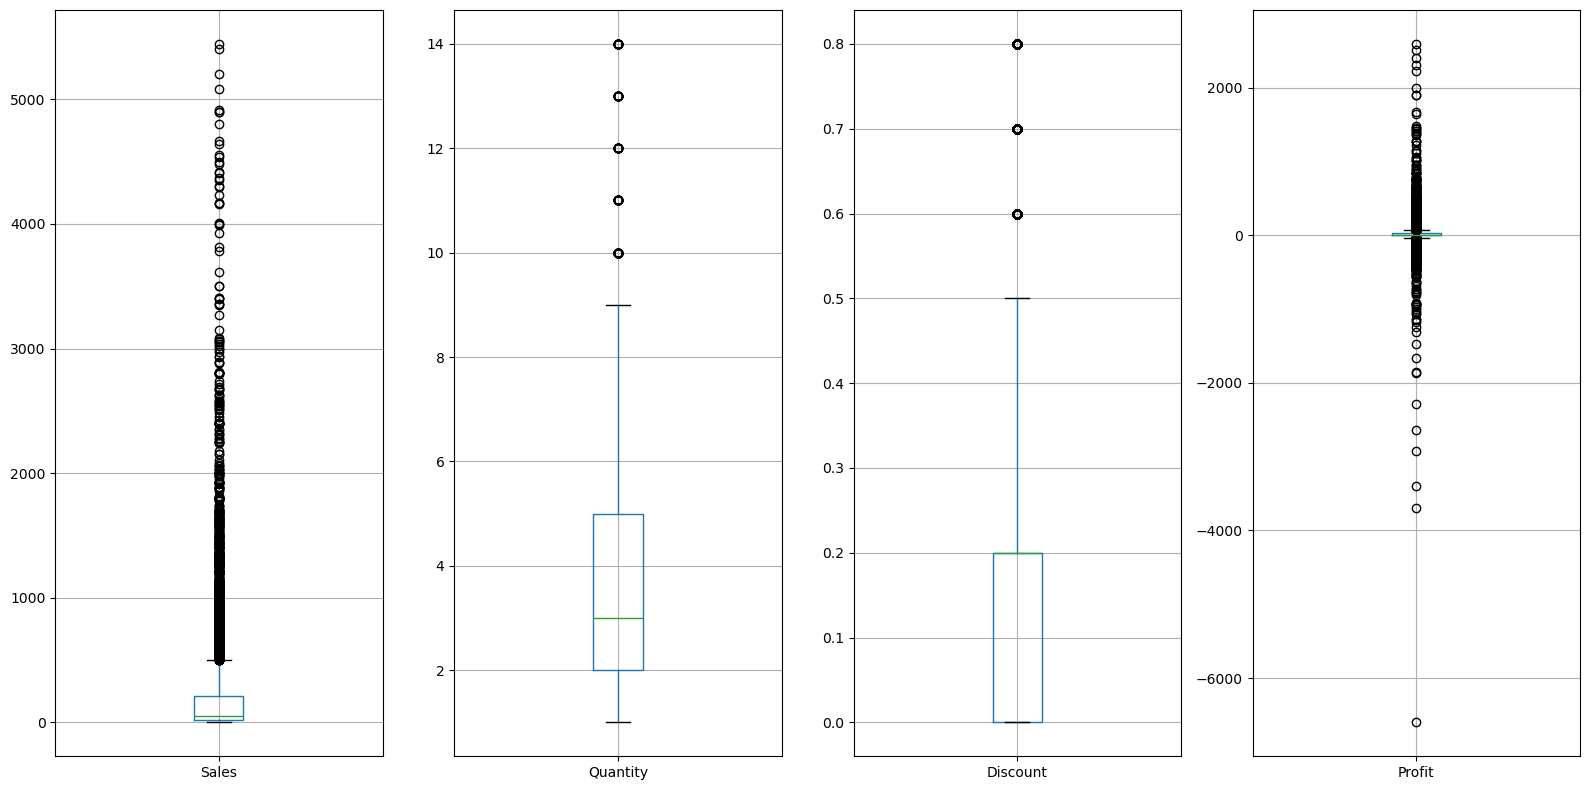

In [130]:
# Extract numerical features
retnum = ret.select_dtypes([int, float]).drop(columns = "Profitability")
# Box plot for Numerical Features

# Create subplots
fig, ax = plt.subplots(1, len(retnum.columns), figsize=(16, 8))

# Plot a boxplot for each column
for i, col in enumerate(retnum.columns):
    retnum.boxplot(column = col, ax = ax[i])

plt.tight_layout()
plt.show()

In [131]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9979 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     9979 non-null   object 
 1   Ship Date      9979 non-null   object 
 2   Ship Mode      9979 non-null   object 
 3   Segment        9979 non-null   object 
 4   City           9979 non-null   object 
 5   State          9979 non-null   object 
 6   Category       9979 non-null   object 
 7   Sub-Category   9979 non-null   object 
 8   Returned       9979 non-null   object 
 9   Sales          9979 non-null   float64
 10  Quantity       9979 non-null   int64  
 11  Discount       9979 non-null   float64
 12  Profit         9979 non-null   float64
 13  Profitability  9979 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 1.1+ MB


In [132]:
# Convert "Order Date" to datetime format
ret["Order Date"] = pd.to_datetime(ret["Order Date"], errors = "coerce")

# Extract year and month for trend analysis
ret["Year"] = ret["Order Date"].dt.year
ret["Month"] = ret["Order Date"].dt.month

# Yearly sales and profit trend
yearly_trend = ret.groupby(["Year"])[["Sales", "Profit"]].sum()

# Display the first five rows
yearly_trend.head()

,Sales,Profit
Year,,
2014,428811.49,45516.98
2015,464177.45,58440.95
2016,555563.15,62162.59
2017,689515.18,81599.44


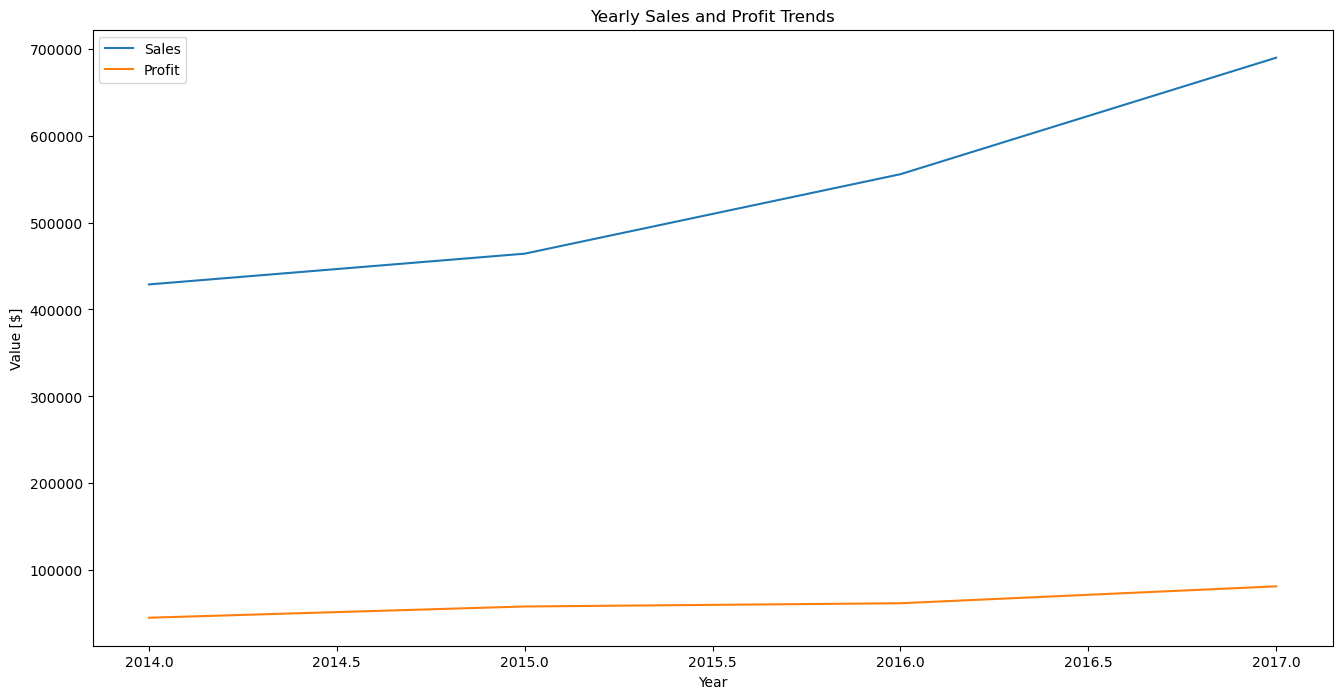

In [133]:
# Line plot for Yearly Sales and Profit Trends
yearly_trend.plot(kind = "line",
                  xlabel = "Year", 
                  ylabel = "Value [$]", 
                  figsize=(16, 8), 
                  title = "Yearly Sales and Profit Trends"
                 );

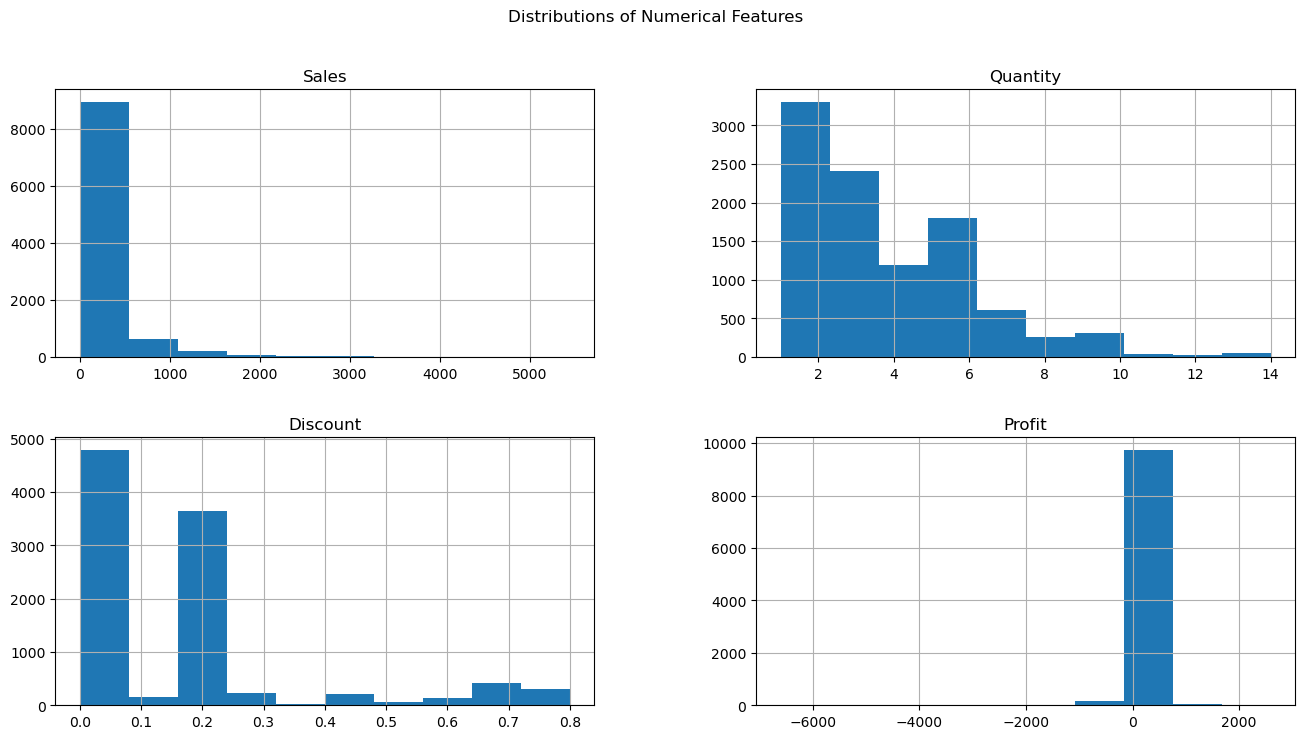

In [134]:
# Visualize the distribution of Numerical Features
retnum.hist(bins = 10, figsize = (16, 8))
plt.suptitle("Distributions of Numerical Features")
plt.show();

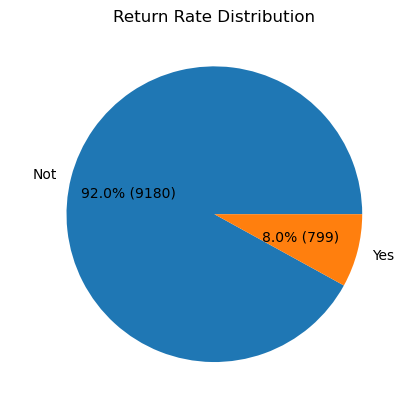

In [135]:
# Returned distribution
returned = ret["Returned"].value_counts()
returned.plot(kind = "pie", 
              autopct = lambda p: f'{p:.1f}% ({p * returned.sum()/100:.0f})',
              ylabel = " ",
              title = "Return Rate Distribution"
);

In [136]:
# Perform shipping analysis
shipping_analysis = ret.groupby("Ship Mode")[["Sales", "Profit"]].sum()
shipping_analysis

,Sales,Profit
Ship Mode,,
First Class,326228.38,38329.82
Same Day,120363.11,19731.81
Second Class,442255.79,54318.80
Standard Class,1249219.99,135339.53


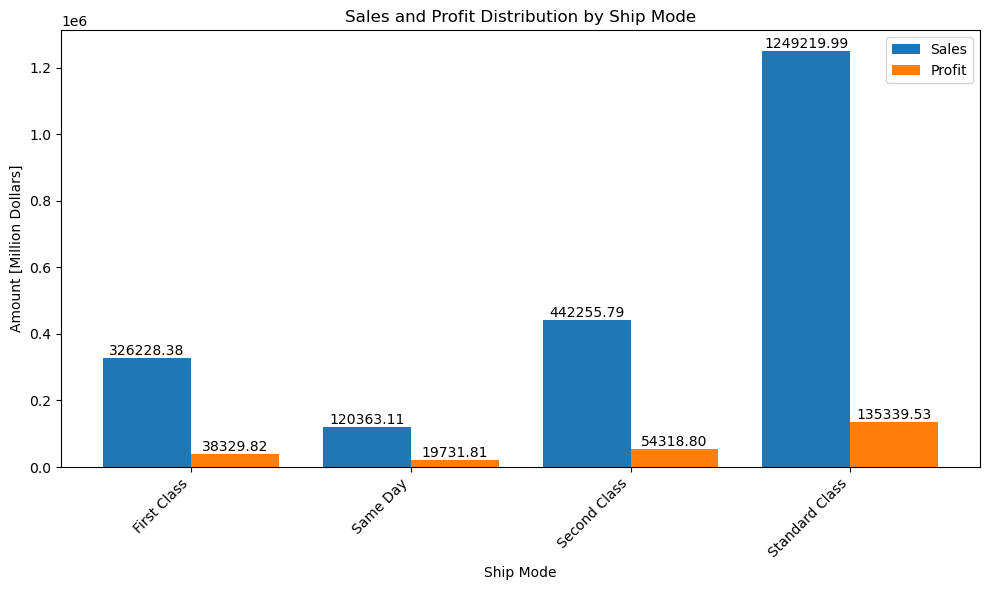

In [137]:
# Plot side-by-side bar chart of shipping_analysis
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(shipping_analysis.index))

# Access columns by actual labels from shipping_analysis
sales_bars = ax.bar(index - bar_width / 2, shipping_analysis["Sales"], bar_width, label="Sales")
profit_bars = ax.bar(index + bar_width / 2, shipping_analysis["Profit"], bar_width, label="Profit")

# Annotate each bar with its value
for bar in sales_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

for bar in profit_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Customize the plot
plt.xlabel("Ship Mode")
plt.ylabel("Amount [Million Dollars]")
plt.title("Sales and Profit Distribution by Ship Mode")
plt.xticks(index, shipping_analysis.index, rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [138]:
# Perform average shipping analysis
avg_shipping = ret.groupby("Ship Mode")[["Sales", "Profit"]].mean()
avg_shipping

,Sales,Profit
Ship Mode,,
First Class,212.388268,24.954310
Same Day,222.072159,36.405554
Second Class,227.614920,27.956150
Standard Class,209.671029,22.715598


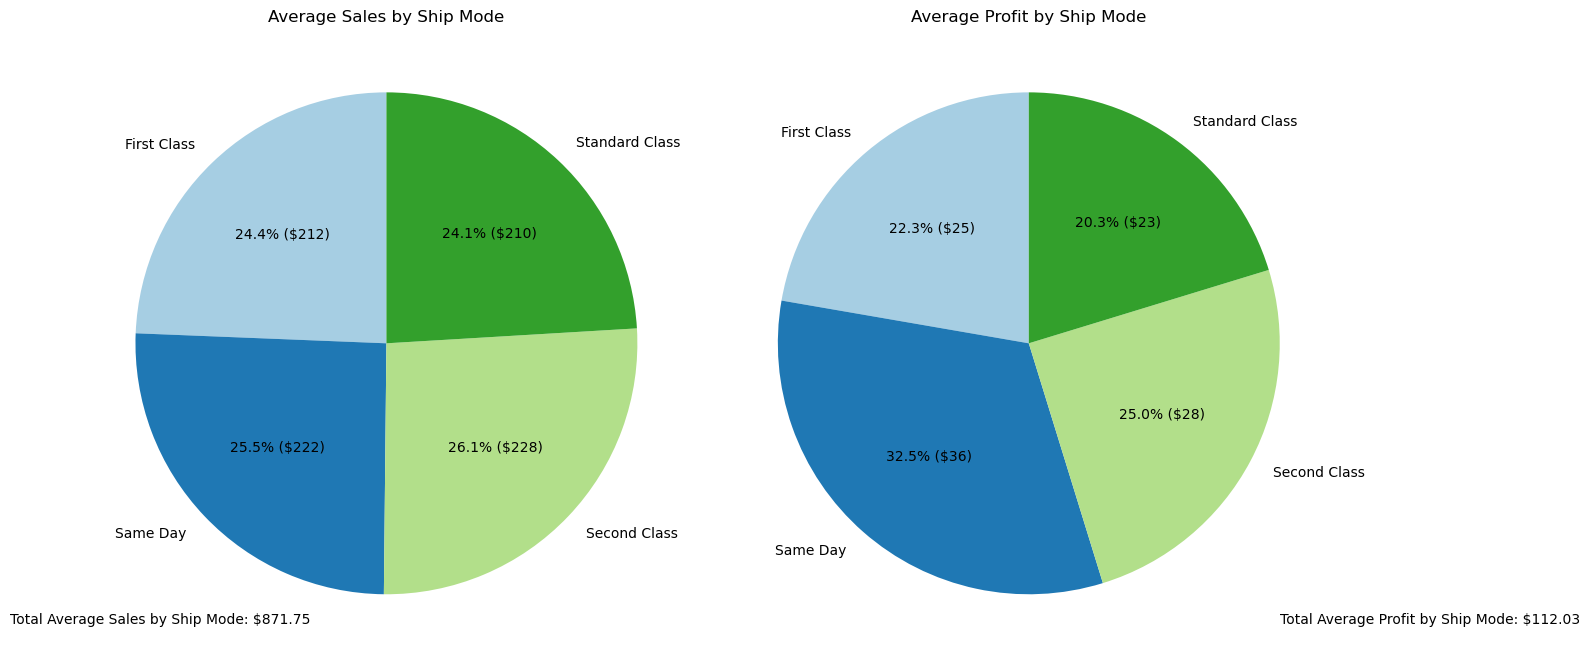

In [139]:
# Side-by-side pie charts for average shipping analysis
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for Sales by Ship Mode
ax[0].pie(avg_shipping["Sales"], 
            labels = avg_shipping.index, 
            autopct = lambda p: f'{p:.1f}% (${p * avg_shipping["Sales"].sum()/100:.0f})',
            startangle = 90, 
            colors = plt.cm.Paired.colors)
ax[0].set_title("Average Sales by Ship Mode")
avg_shipsales = avg_shipping["Sales"].sum()
ax[0].text(-1.5, -1.1, f'Total Average Sales by Ship Mode: ${round(avg_shipsales, 2)}', verticalalignment = "center");

# Pie chart for Profit by Ship Mode
ax[1].pie(avg_shipping["Profit"], 
            labels = avg_shipping.index, 
            autopct = lambda p: f'{p:.1f}% (${p * avg_shipping["Profit"].sum()/100:.0f})',
            startangle = 90, 
            colors = plt.cm.Paired.colors)
ax[1].set_title("Average Profit by Ship Mode")

avg_shipprofit = avg_shipping["Profit"].sum()
ax[1].text(1, -1.1, f'Total Average Profit by Ship Mode: ${round(avg_shipprofit, 2)}', verticalalignment = "center"); 

# Display the plot
plt.tight_layout()
plt.show()

In [140]:
# Calculate profitability by ship mode
SM_fitability = (ret[["Ship Mode", "Profitability"]].groupby("Ship Mode").mean().round(2)
 .sort_values(by = "Profitability", ascending = False)
)
SM_fitability.head()

,Profitability
Ship Mode,
Second Class,15.02
Same Day,13.93
First Class,11.55
Standard Class,10.98


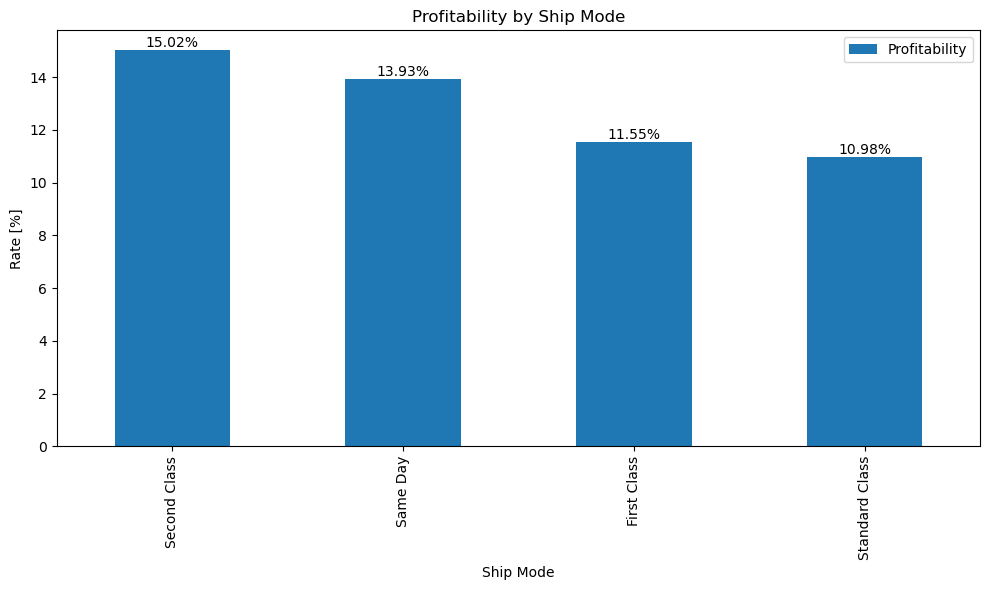

In [141]:
# Plot bar chart of SM_fitability
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
fitablity_bars = SM_fitability.plot(kind="bar", ax=ax)

# Annotate each bar with its profitability value
for bar in fitablity_bars.containers[0]:  # Access container elements (bars)
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", ha='center', va='bottom')

# Customize the plot
plt.xlabel("Ship Mode")
plt.ylabel("Rate [%]")
plt.title("Profitability by Ship Mode")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [142]:
# Perform segmental analysis
segment_performance = ret.groupby("Segment")[["Sales", "Profit"]].sum()
segment_performance

,Sales,Profit
Segment,,
Consumer,1070706.08,104476.91
Corporate,671546.47,85053.14
Home Office,395814.72,58189.91


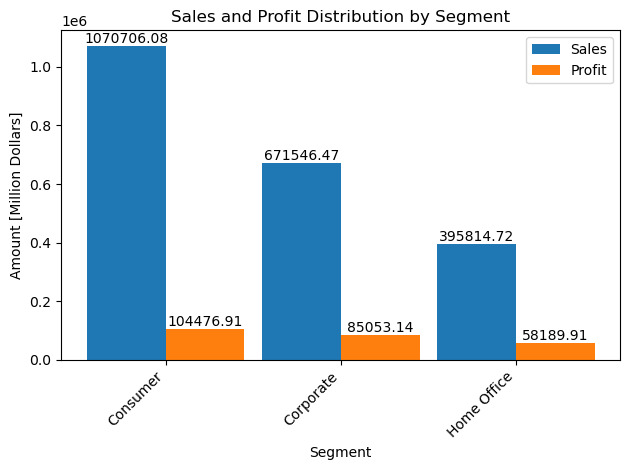

In [143]:
# Plot side-by-side bar chart of segmental analysis
bar_width = 0.45
index = np.arange(len(segment_performance.index))

# Create the bars
sales_bars = plt.bar(index - bar_width / 2, segment_performance["Sales"], bar_width, label="Sales")
profit_bars = plt.bar(index + bar_width / 2, segment_performance["Profit"], bar_width, label="Profit")

# Annotate each bar with its value
for bar in sales_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

for bar in profit_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Customize the plot
plt.xlabel("Segment")
plt.ylabel("Amount [Million Dollars]")
plt.title("Sales and Profit Distribution by Segment")
plt.xticks(index, segment_performance.index, rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [144]:
# Perform segmental analysis
avg_segment_performance = ret.groupby("Segment")[["Sales", "Profit"]].mean()
avg_segment_performance

,Sales,Profit
Segment,,
Consumer,206.660120,20.165395
Corporate,222.587494,28.191296
Home Office,222.242965,32.672605


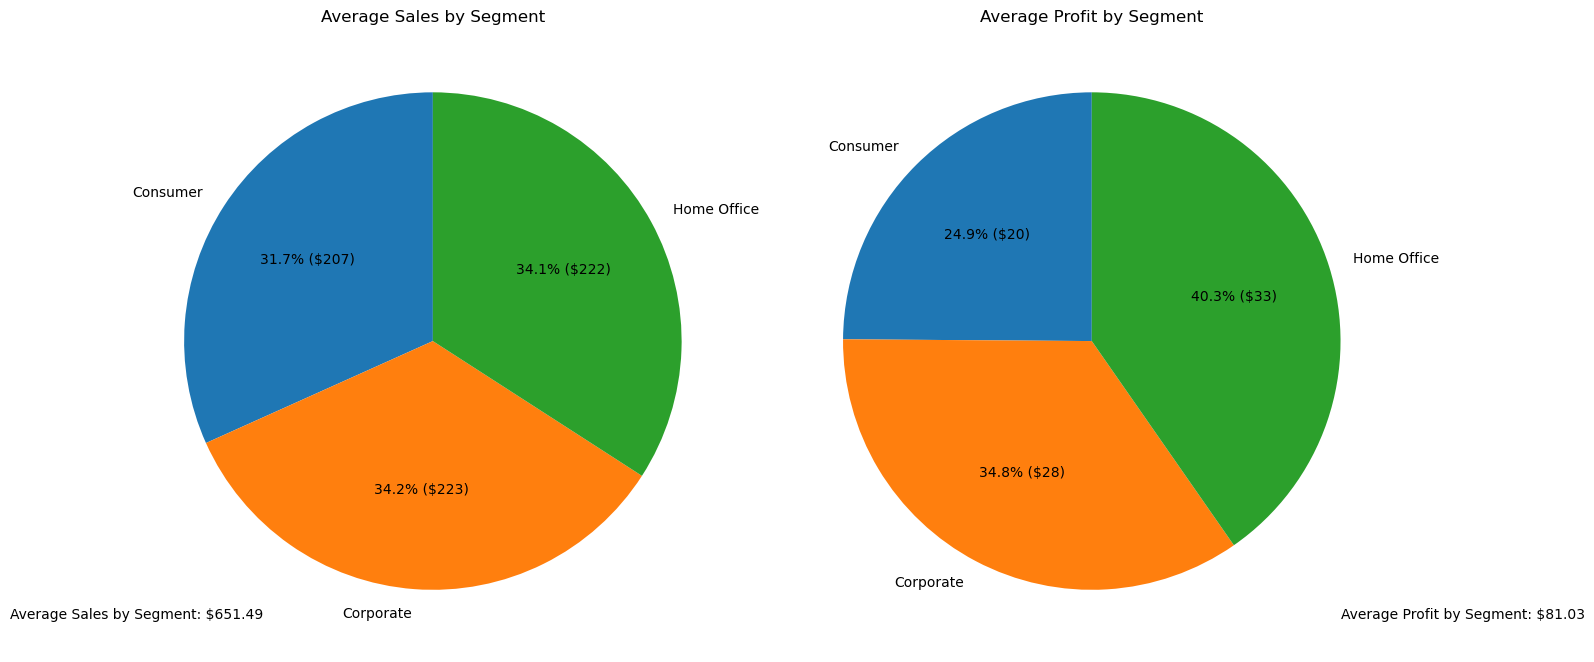

In [145]:
# Side-by-side pie charts for average segmental analysis
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for Sales by Segment
ax[0].pie(avg_segment_performance["Sales"], 
            labels = avg_segment_performance.index, 
            autopct = lambda p: f'{p:.1f}% (${p * avg_segment_performance["Sales"].sum()/100:.0f})',
            startangle = 90
         )
ax[0].set_title("Average Sales by Segment")
avg_segsales = avg_segment_performance["Sales"].sum()
ax[0].text(-1.7, -1.1, f'Average Sales by Segment: ${round(avg_segsales, 2)}', verticalalignment = "center");

# Pie chart for Profit by Segment
ax[1].pie(avg_segment_performance["Profit"], 
            labels = avg_segment_performance.index, 
            autopct = lambda p: f'{p:.1f}% (${p * avg_segment_performance["Profit"].sum()/100:.0f})',
            startangle = 90
)
ax[1].set_title("Average Profit by Segment")

avg_segprofit = avg_segment_performance["Profit"].sum()
ax[1].text(1, -1.1, f'Average Profit by Segment: ${round(avg_segprofit, 2)}', verticalalignment = "center"); 

# Display the plot
plt.tight_layout()
plt.show()

In [146]:
# Calculate profitability by segment
Seg_fitability = (ret[["Segment", "Profitability"]].groupby("Segment").mean().round(2)
 .sort_values(by = "Profitability", ascending = False)
)
Seg_fitability.head()

,Profitability
Segment,
Home Office,14.29
Corporate,12.12
Consumer,11.17


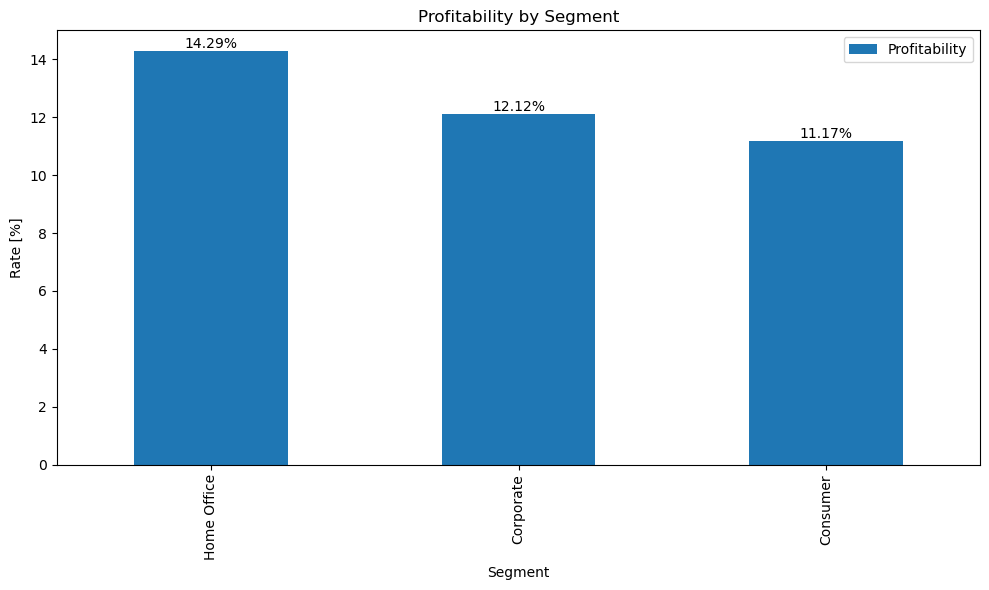

In [147]:
# Plot bar chart of Seg_fitability
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
segitablity_bars = Seg_fitability.plot(kind="bar", ax=ax)

# Annotate each bar with its profitability value
for bar in segitablity_bars.containers[0]:  # Access container elements (bars)
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", ha='center', va='bottom')

# Customize the plot
plt.xlabel("Segment")
plt.ylabel("Rate [%]")
plt.title("Profitability by Segment")
plt.tight_layout()

# Show the plot
plt.show()

In [148]:
# Perform state-wise analysis
state_performance = ret.groupby("State")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False).round()
state_performance.head()

,Sales,Profit
State,,
California,449500.0,76054.0
New York,292676.0,67878.0
Texas,162028.0,-24369.0
Washington,124641.0,26683.0
Pennsylvania,108112.0,-16680.0


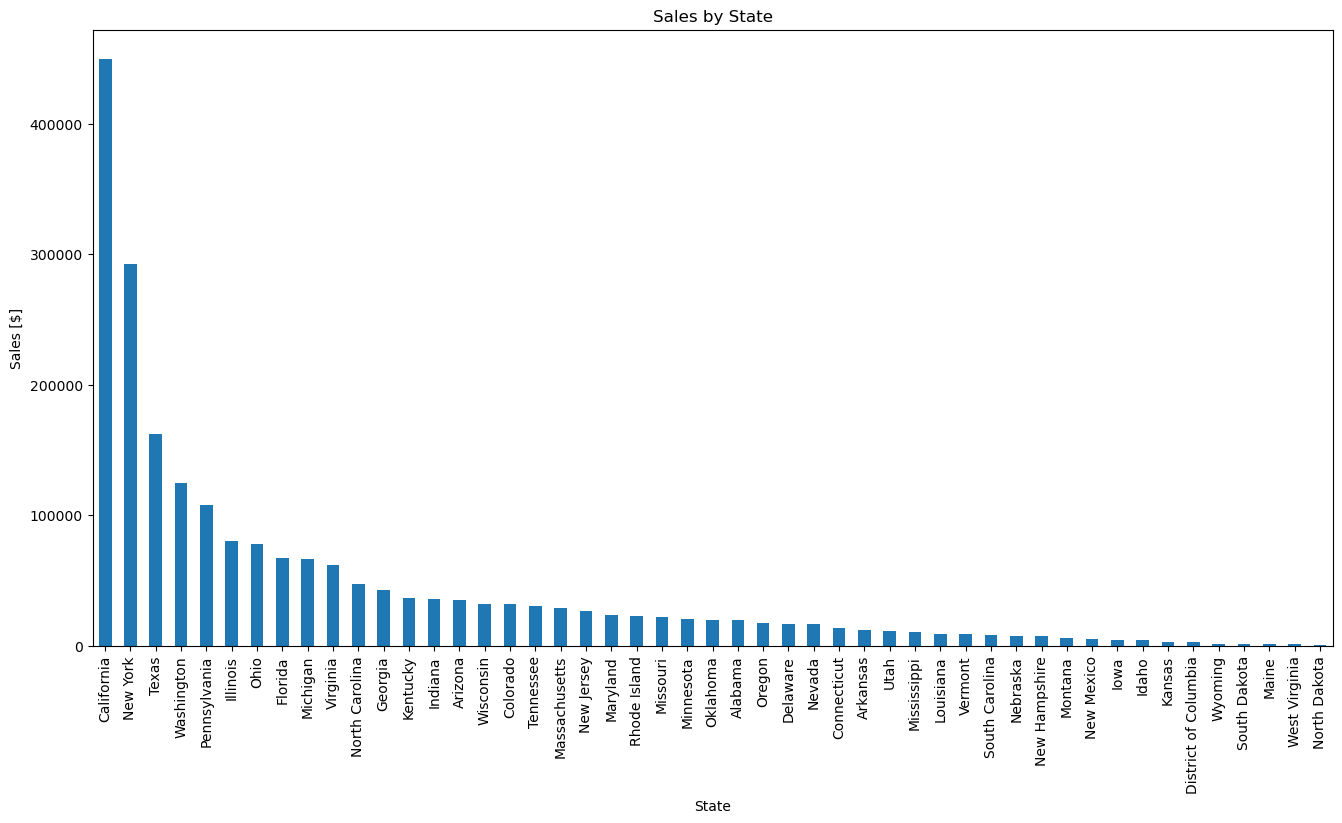

In [149]:
# Bar plot for state-wise sales analysis
bar = state_performance["Sales"].plot(
    kind = "bar",
    xlabel = "State",
    ylabel = "Sales [$]",
    title = "Sales by State",
    figsize = (16, 8)
)

# Show the plot
plt.show()

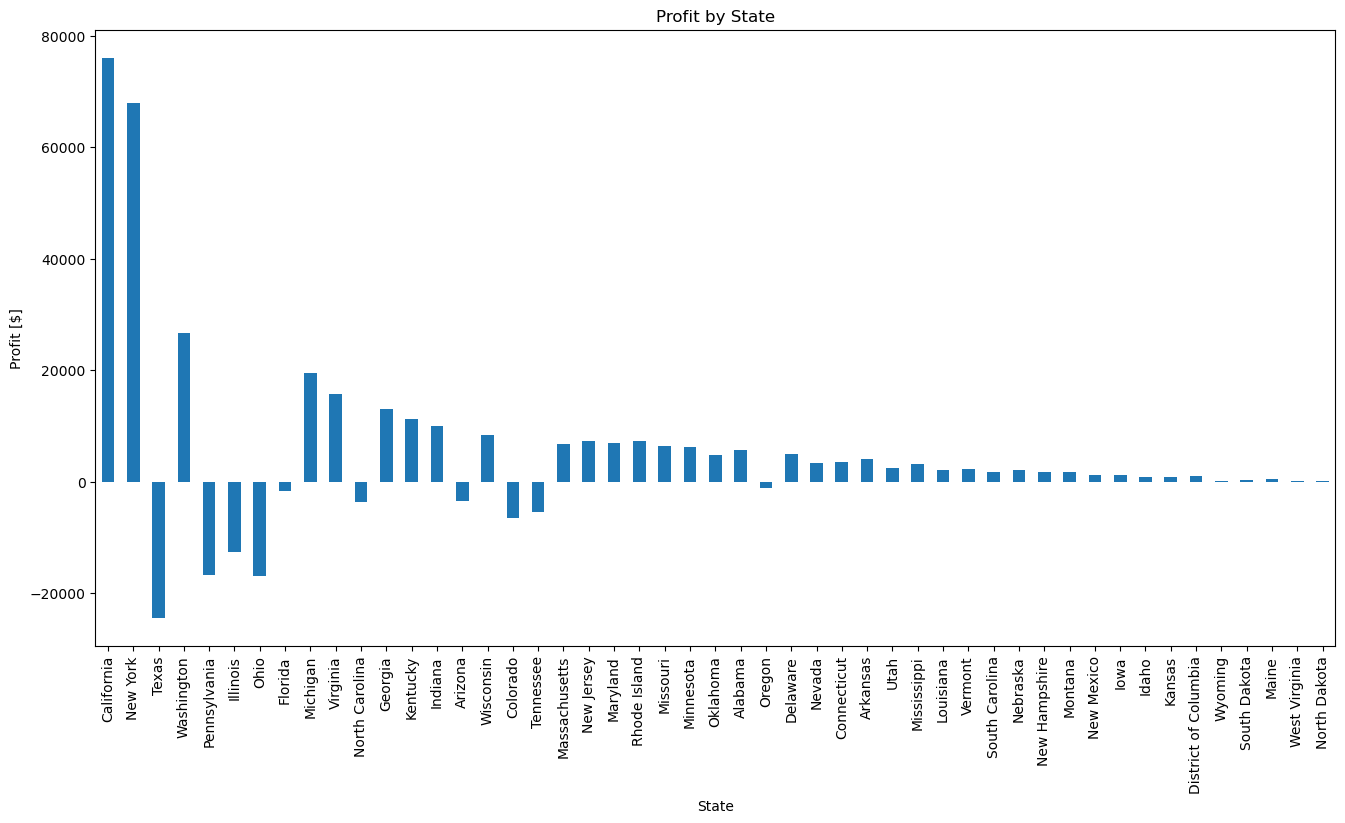

In [150]:
# Bar plot for state-wise profit analysis
state_performance["Profit"].plot(
    kind = "bar",
    xlabel = "State",
    ylabel = "Profit [$]",
    title = "Profit by State",
    figsize = (16, 8)
); 

In [151]:
# Get the top 7 states by Profit
top_states = state_performance.nlargest(n=7, columns="Profit") 
top_states

,Sales,Profit
State,,
California,449500.0,76054.0
New York,292676.0,67878.0
Washington,124641.0,26683.0
Michigan,66377.0,19517.0
Virginia,61887.0,15798.0
Georgia,42741.0,13073.0
Kentucky,36592.0,11200.0


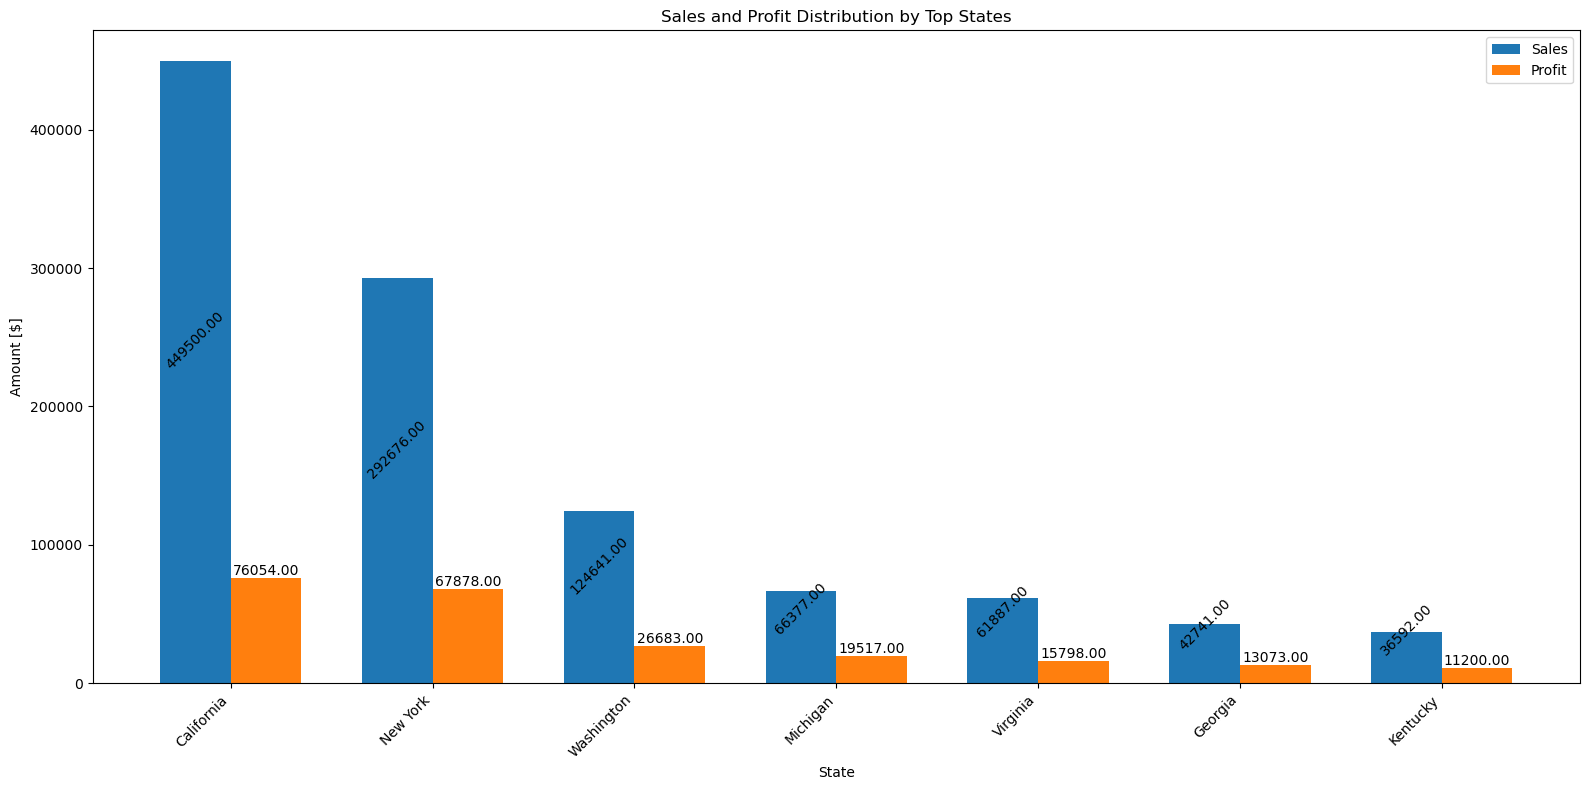

In [152]:
# Plot bar chart of top_states
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.35
index = np.arange(len(top_states.index))

# Create the bars
sales_bars = plt.bar(index - bar_width / 2, top_states["Sales"], bar_width, label="Sales")
profit_bars = plt.bar(index + bar_width / 2, top_states["Profit"], bar_width, label="Profit")

# Annotate each bar with its value
for bar in sales_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height/2, f'{height:.2f}', ha='center', va='bottom', rotation=45)

for bar in profit_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Customize the plot
plt.xlabel("State")
plt.ylabel("Amount [$]")
plt.title("Sales and Profit Distribution by Top States")
plt.xticks(index, top_states.index, rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [153]:
# Bottom 5 profitable states
bottom_states = state_performance.nsmallest(n=7, columns="Profit") 
bottom_states

,Sales,Profit
State,,
Texas,162028.0,-24369.0
Ohio,78258.0,-16971.0
Pennsylvania,108112.0,-16680.0
Illinois,80166.0,-12608.0
Colorado,32108.0,-6528.0
Tennessee,30662.0,-5342.0
North Carolina,47603.0,-3651.0


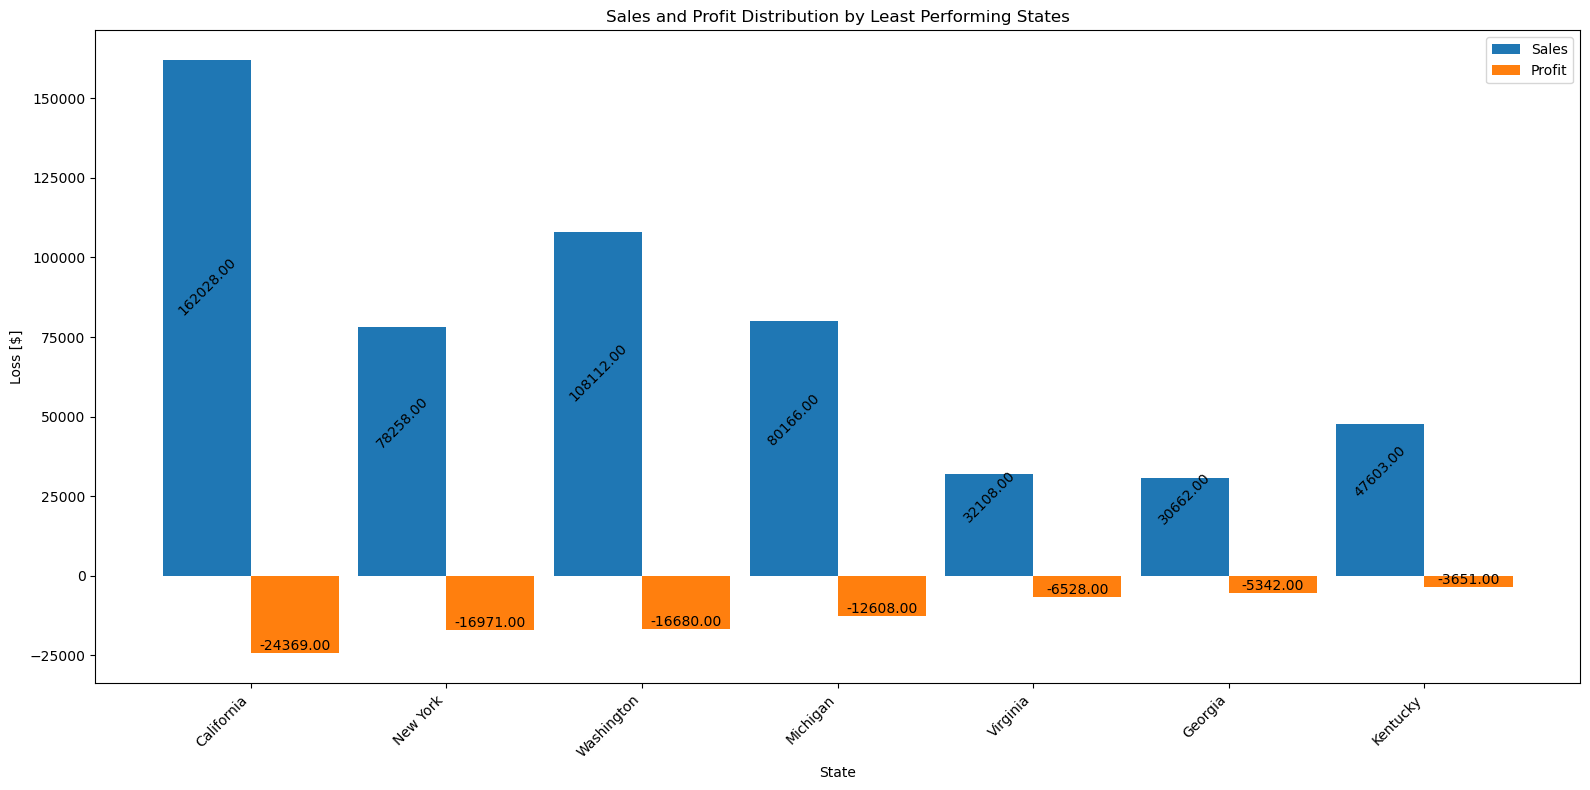

In [154]:
# Plot bar chart of bottom_states
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.45
index = np.arange(len(top_states.index))

# Create the bars
sales_bars = plt.bar(index - bar_width / 2, bottom_states["Sales"], bar_width, label="Sales")
profit_bars = plt.bar(index + bar_width / 2, bottom_states["Profit"], bar_width, label="Profit")

# Annotate each bar with its value
for bar in sales_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height/2, f'{height:.2f}', ha='center', va='bottom', rotation=45)

for bar in profit_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Customize the plot
plt.xlabel("State")
plt.ylabel("Loss [$]")
plt.title("Sales and Profit Distribution by Least Performing States")
plt.xticks(index, top_states.index, rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [155]:
# Calculate profitability by state
State_fitability = (ret[["State", "Profitability"]].groupby("State").mean().round(2)
 .sort_values(by = "Profitability", ascending = False)
)
State_fitability.head()

,Profitability
State,
District of Columbia,42.20
Iowa,39.93
Arkansas,37.95
South Dakota,37.76
Maine,36.37


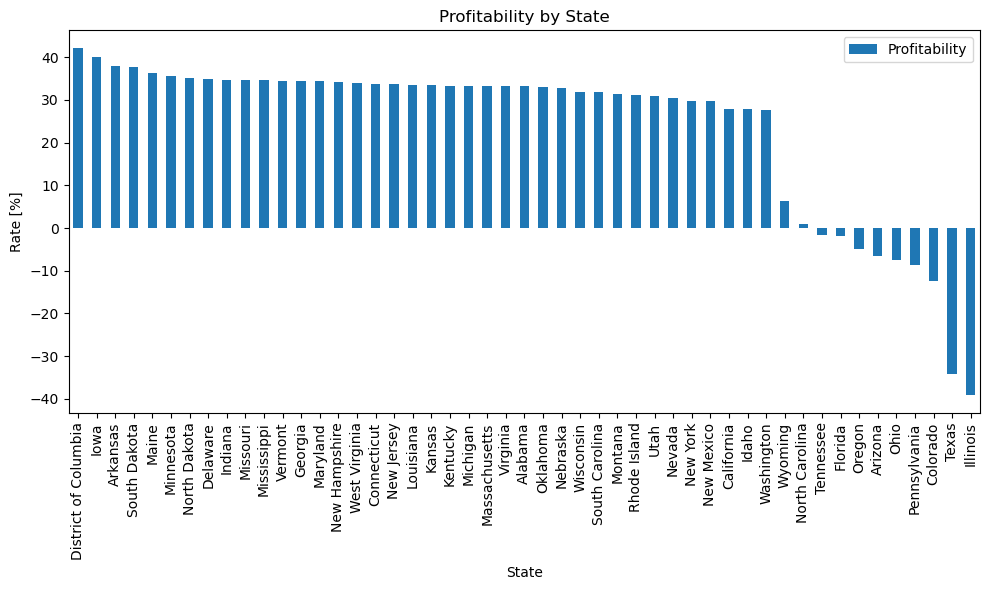

In [156]:
# Plot bar chart of State_fitability
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
State_fitability.plot(kind="bar", ax=ax)

# Customize the plot
plt.xlabel("State")
plt.ylabel("Rate [%]")
plt.title("Profitability by State")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [157]:
# Perform Categorical Analysis
category_performance = ret.groupby("Category")[["Sales", "Profit"]].sum()
category_performance.sort_values("Sales", ascending=False).head()

,Sales,Profit
Category,,
Furniture,741999.73,18451.18
Technology,710905.98,119860.48
Office Supplies,685161.56,109408.30


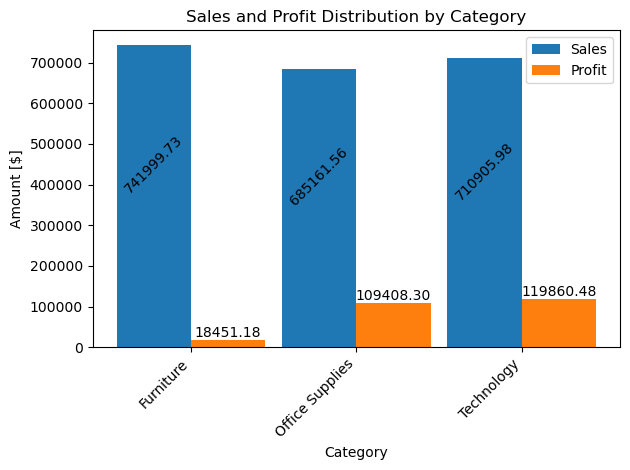

In [158]:
# Plot side-by-side bar chart of categorical analysis
bar_width = 0.45
index = np.arange(len(category_performance.index))

# Create the bars
sales_bars = plt.bar(index - bar_width / 2, category_performance["Sales"], bar_width, label="Sales")
profit_bars = plt.bar(index + bar_width / 2, category_performance["Profit"], bar_width, label="Profit")

# Annotate each bar with its value
for bar in sales_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height/2, f'{height:.2f}', rotation=45, ha='center', va='bottom')

for bar in profit_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Customize the plot
plt.xlabel("Category")
plt.ylabel("Amount [$]")
plt.title("Sales and Profit Distribution by Category")
plt.xticks(index, category_performance.index, rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [159]:
# Perform average categorical analysis
avg_cat_performance = ret.groupby("Category")[["Sales", "Profit"]].mean().round()
avg_cat_performance

,Sales,Profit
Category,,
Furniture,350.0,9.0
Office Supplies,114.0,18.0
Technology,387.0,65.0


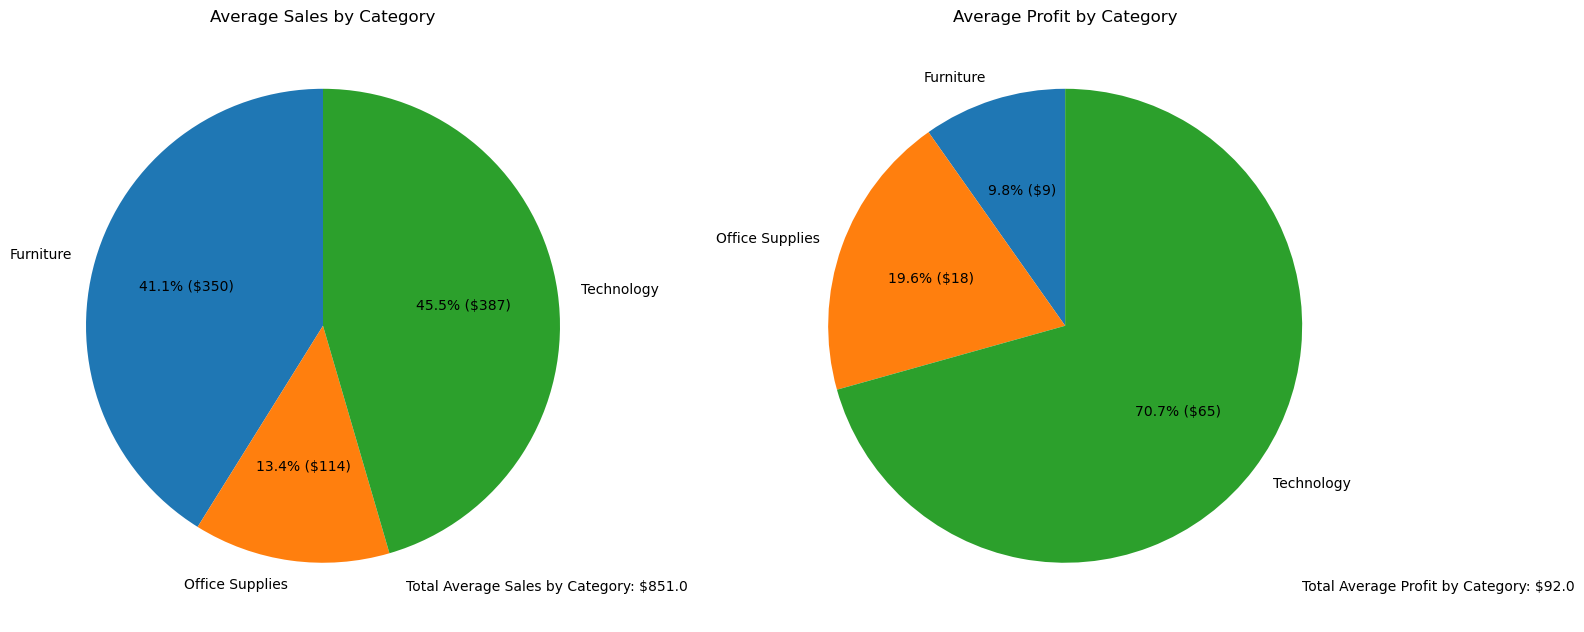

In [160]:
# Side-by-side pie charts for categorical analysis
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for Sales by Ship Mode
ax[0].pie(avg_cat_performance["Sales"], 
            labels = avg_cat_performance.index, 
            autopct = lambda p: f'{p:.1f}% (${p * avg_cat_performance["Sales"].sum()/100:.0f})',
            startangle = 90
         )
ax[0].set_title("Average Sales by Category")
avg_catsales = avg_cat_performance["Sales"].sum()
ax[0].text(0.35, -1.1, f'Total Average Sales by Category: ${round(avg_catsales, 2)}', verticalalignment = "center");

# Pie chart for Profit by Ship Mode
ax[1].pie(avg_cat_performance["Profit"], 
            labels = avg_cat_performance.index, 
            autopct = lambda p: f'{p:.1f}% (${p * avg_cat_performance["Profit"].sum()/100:.0f})',
            startangle = 90
)
ax[1].set_title("Average Profit by Category")

avg_catprofit = avg_cat_performance["Profit"].sum()
ax[1].text(1, -1.1, f'Total Average Profit by Category: ${round(avg_catprofit, 2)}', verticalalignment = "center"); 

# Display the plot
plt.tight_layout()
plt.show()

In [161]:
# Calculate profitability by ship mode
cat_fitability = (ret[["Category", "Profitability"]].groupby("Category").mean().round(2)
 .sort_values(by = "Profitability", ascending = False)
)
cat_fitability.head()

,Profitability
Category,
Technology,15.59
Office Supplies,13.79
Furniture,3.88


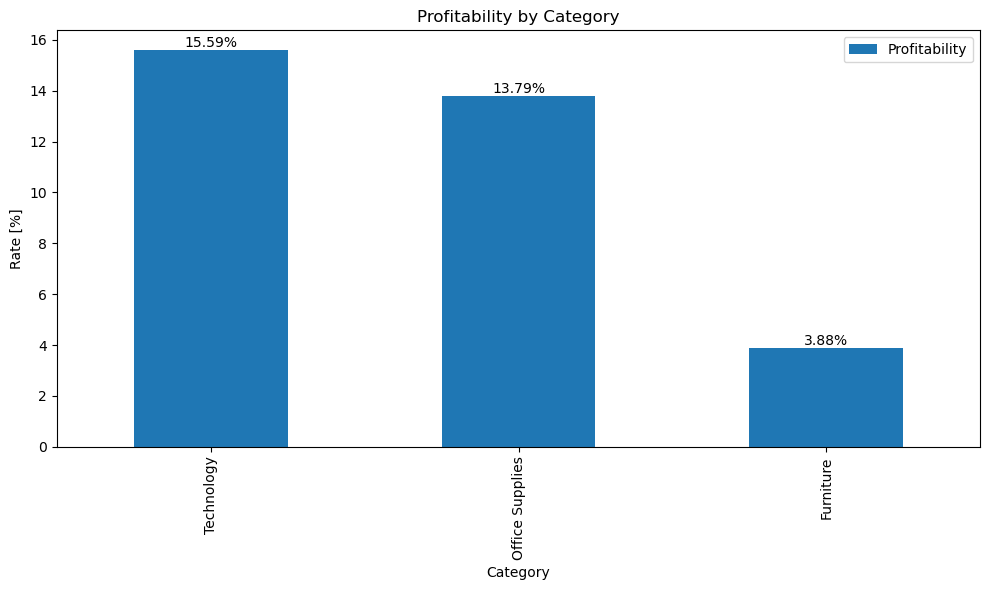

In [162]:
# Plot bar chart of cat_fitability
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
catitablity_bars = cat_fitability.plot(kind="bar", ax=ax)

# Annotate each bar with its profitability value
for bar in catitablity_bars.containers[0]:  # Access container elements (bars)
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", ha='center', va='bottom')

# Customize the plot
plt.xlabel("Category")
plt.ylabel("Rate [%]")
plt.title("Profitability by Category")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

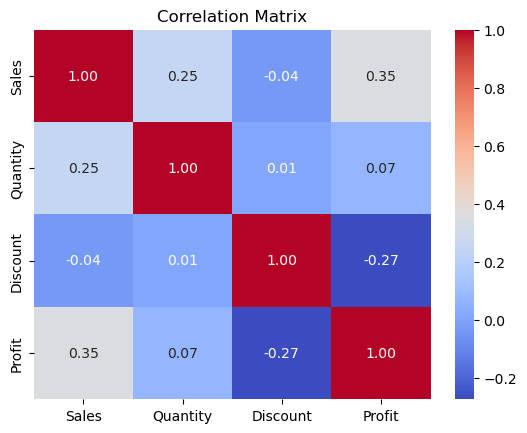

In [163]:
# Plot the correlation matrix of the main numerical features
sns.heatmap(retnum.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix");

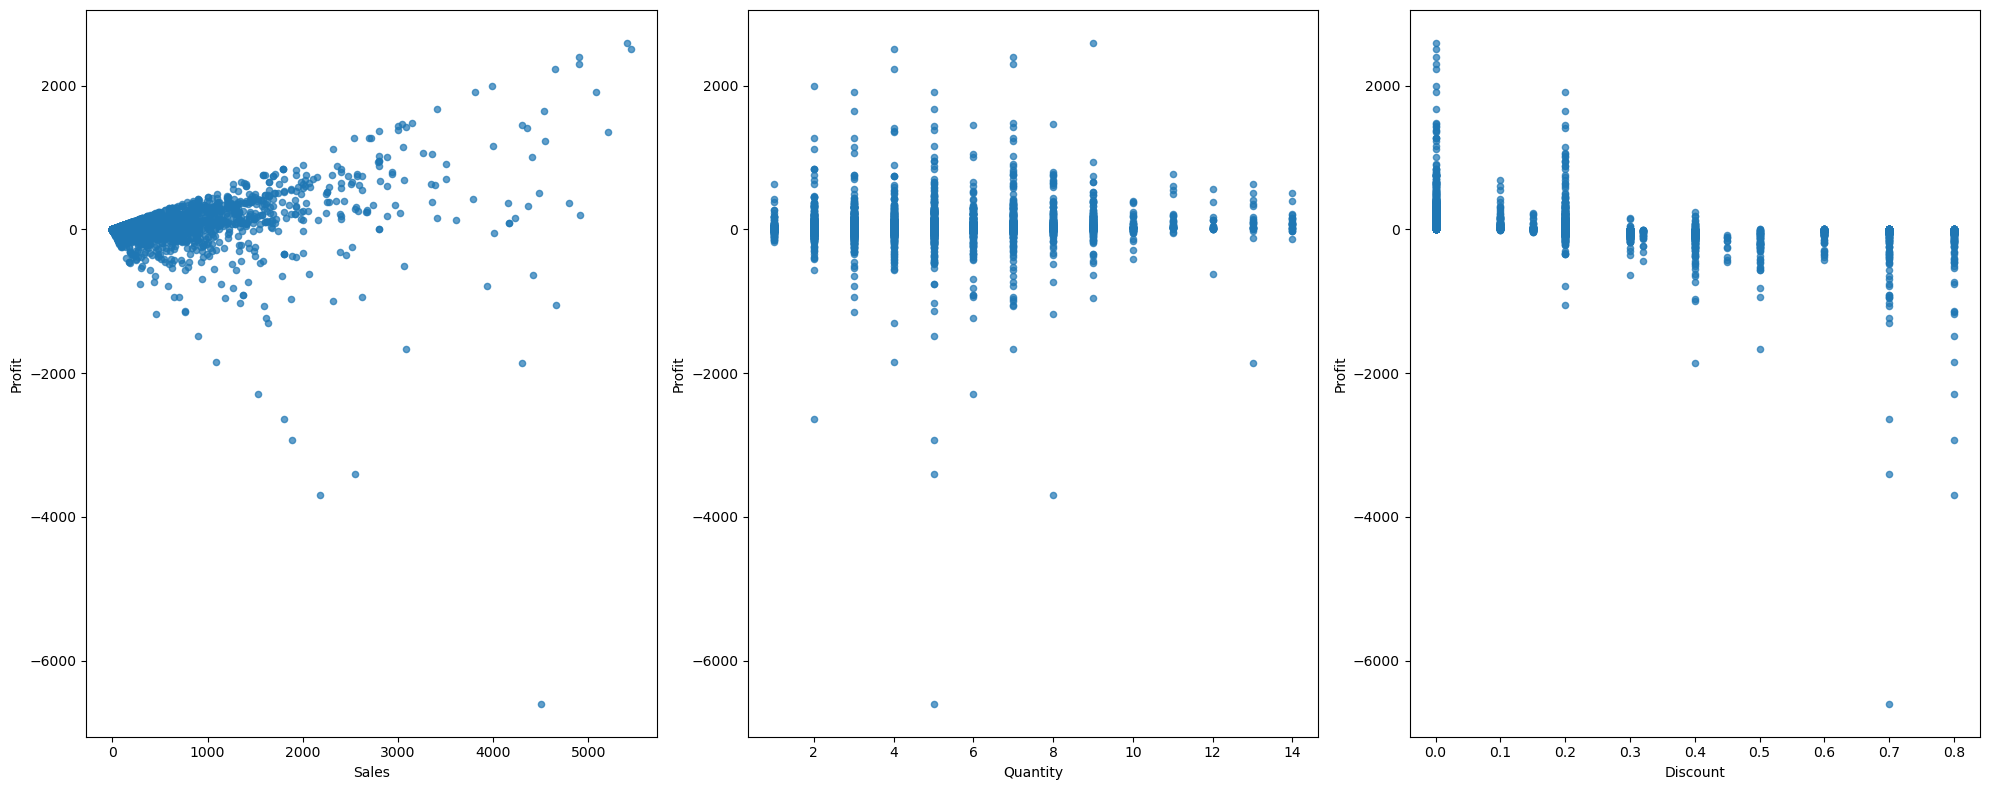

In [164]:
nretnum = retnum.drop(columns = "Profit")
# Create subplots
fig, ax = plt.subplots(1, len(nretnum.columns), figsize=(20, 8))

# Plot scatter plots for each column against "Spending Score"
for i, col in enumerate(nretnum.columns):
    ret.plot.scatter(x=col, y="Profit", ax=ax[i], alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()